In [1]:
# import libraries
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

In [2]:
# set input directory
input_dir = 'input'

In [3]:
# set dataset file name
input_data_file = 'data.xlsx'

In [4]:
# to get the input data path
data_path = os.path.join(os.curdir,input_dir,input_data_file)
data_path

'.\\input\\data.xlsx'

In [5]:
# to read data from excel file
raw_data = pd.read_excel(data_path)

In [6]:
raw_data.head()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
0,16,2.1,0.79,0.14,1.2,16,17,37,177,78x,57,12
1,16,2.1,0.8,0.15,1.3,16,17,36,178,77x,57,11
2,16,2.1,0.71,0.13,1,13,14,38,163,72x,57,8
3,15,2,0.66,0.12,0.8,11,12,39,147,65x,58,6.5
4,15,2,0.53,0.11,0.6,10,11,38,131,56x,58,5.5


In [7]:
raw_data.describe()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
count,200169,95822,217310,95614,217227,216681,217228,199864,215761,215768,200243,217046
unique,267,135,1054,594,921,715,1053,632,619,580,349,639
top,26,1.9,0.23,0.09,1.2,11,11,32,33,13,81,1.6
freq,14235,30832,4133,3214,6324,7865,6952,4219,5235,8964,5970,6958


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218639 entries, 0 to 218638
Data columns (total 12 columns):
TEMP     200169 non-null object
CH4      95822 non-null object
CO       217310 non-null object
NMHC     95614 non-null object
NO       217227 non-null object
NO2      216681 non-null object
NOx      217228 non-null object
O3       199864 non-null object
PM10     215761 non-null object
PM2.5    215768 non-null object
RH       200243 non-null object
SO2      217046 non-null object
dtypes: object(12)
memory usage: 20.0+ MB


In [9]:
raw_data.columns

Index(['TEMP', 'CH4', 'CO', 'NMHC', 'NO', 'NO2', 'NOx', 'O3', 'PM10', 'PM2.5',
       'RH', 'SO2'],
      dtype='object')

In [10]:
raw_data.isna().sum()

TEMP      18470
CH4      122817
CO         1329
NMHC     123025
NO         1412
NO2        1958
NOx        1411
O3        18775
PM10       2878
PM2.5      2871
RH        18396
SO2        1593
dtype: int64

In [11]:
def numeric(row):
    try:
        row =str(row)
        row=(row.replace('x','').replace('#','').replace('*','').replace('NR',''))
        if (row==''):
            return
        else:
            return float(row.replace('x','').replace('#','').replace('*','').replace('NR',''))
                
    except TypeError:
        row =str(row)
        if (row==''):
            return
        else:
            return float(row.replace('x','').replace('#','').replace('*','').replace('NR',''))
       

In [12]:

raw_data['O3'] = raw_data['O3'].apply(numeric)
raw_data['PM2.5'] = raw_data['PM2.5'].apply(numeric)
raw_data['TEMP'] = raw_data['TEMP'].apply(numeric)
raw_data['CH4'] = raw_data['CH4'].apply(numeric)
raw_data['CO'] = raw_data['CO'].apply(numeric)
raw_data['NMHC'] = raw_data['NMHC'].apply(numeric)
raw_data['NO'] = raw_data['NO'].apply(numeric)
raw_data['NO2'] = raw_data['NO2'].apply(numeric)
raw_data['NOx'] = raw_data['NOx'].apply(numeric)
raw_data['PM10'] = raw_data['PM10'].apply(numeric)
raw_data['RH'] = raw_data['RH'].apply(numeric)
raw_data['SO2'] = raw_data['SO2'].apply(numeric)


In [13]:
raw_data['O3'] = raw_data['O3'].fillna(raw_data['O3'].mean())
raw_data['PM2.5'] = raw_data['PM2.5'].fillna(raw_data['PM2.5'].mean())
raw_data['TEMP'] = raw_data['TEMP'].fillna(raw_data['TEMP'].mean())
raw_data['CH4'] = raw_data['CH4'].fillna(raw_data['CH4'].mean())
raw_data['CO'] = raw_data['CO'].fillna(raw_data['CO'].mean())
raw_data['NMHC'] = raw_data['NMHC'].fillna(raw_data['NMHC'].mean())
raw_data['NO'] = raw_data['NO'].fillna(raw_data['NO'].mean())
raw_data['NO2'] = raw_data['NO2'].fillna(raw_data['NO2'].mean())
raw_data['NOx'] = raw_data['NOx'].fillna(raw_data['NOx'].mean())
raw_data['PM10'] = raw_data['PM10'].fillna(raw_data['PM10'].mean())
raw_data['RH'] = raw_data['RH'].fillna(raw_data['RH'].mean())
raw_data['SO2'] = raw_data['SO2'].fillna(raw_data['SO2'].mean())

In [14]:
raw_data.isna().sum()

TEMP     0
CH4      0
CO       0
NMHC     0
NO       0
NO2      0
NOx      0
O3       0
PM10     0
PM2.5    0
RH       0
SO2      0
dtype: int64

In [15]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218639 entries, 0 to 218638
Data columns (total 12 columns):
TEMP     218639 non-null float64
CH4      218639 non-null float64
CO       218639 non-null float64
NMHC     218639 non-null float64
NO       218639 non-null float64
NO2      218639 non-null float64
NOx      218639 non-null float64
O3       218639 non-null float64
PM10     218639 non-null float64
PM2.5    218639 non-null float64
RH       218639 non-null float64
SO2      218639 non-null float64
dtypes: float64(12)
memory usage: 20.0 MB


In [16]:
raw_data.describe()

,TEMP,CH4,CO,NMHC,NO,NO2,NOx,O3,PM10,PM2.5,RH,SO2
count,218639.000000,218639.000000,218639.000000,218639.000000,218639.000000,218639.000000,218639.000000,218639.000000,218639.000000,218639.000000,218639.000000,218639.000000
mean,23.311751,1.928567,0.562539,0.267663,9.014298,17.882309,26.831967,29.047728,45.837390,19.521462,75.803789,3.443175
std,5.639131,0.158130,0.542817,0.158450,17.691158,12.030102,26.610134,17.112154,168.684043,59.907200,13.216443,5.810209
min,-30.000000,-0.800000,-0.890000,-8.240000,-9.400000,-9.200000,-4.700000,-8.500000,-396.000000,-57.000000,0.000000,-7.800000
25%,19.000000,1.900000,0.270000,0.230000,1.400000,8.600000,10.000000,16.000000,26.000000,10.000000,68.000000,1.700000
50%,23.311751,1.928567,0.420000,0.267663,2.700000,16.000000,19.000000,29.047728,37.000000,16.000000,76.000000,2.600000
75%,27.000000,1.928567,0.660000,0.267663,7.600000,25.000000,33.000000,39.000000,52.000000,24.000000,85.000000,4.000000
max,59.000000,15.000000,38.000000,6.860000,358.000000,166.000000,411.000000,200.000000,9999.000000,10199.000000,100.000000,368.000000


In [17]:
temp_data = raw_data[['TEMP','RH','CH4','NMHC','NO', 'NOx']]

In [18]:
# axis = 1 : columnwise operation
data = raw_data.drop(columns=['TEMP','RH','CH4','NMHC','NO', 'NOx'],axis=1)
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2
0,0.79,16.0,37.0,177.0,78.0,12.0
1,0.80,16.0,36.0,178.0,77.0,11.0
2,0.71,13.0,38.0,163.0,72.0,8.0
3,0.66,11.0,39.0,147.0,65.0,6.5
4,0.53,10.0,38.0,131.0,56.0,5.5


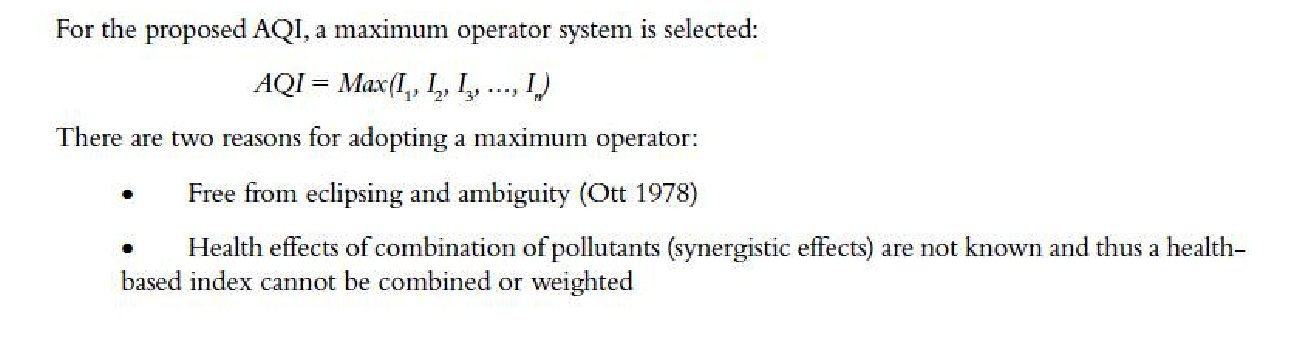

In [19]:
plt.figure(figsize=(20,10), dpi=80)
image = plt.imread('img/aqi.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [20]:
data['AQI']= data.max(axis=1)
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2,AQI
0,0.79,16.0,37.0,177.0,78.0,12.0,177.0
1,0.80,16.0,36.0,178.0,77.0,11.0,178.0
2,0.71,13.0,38.0,163.0,72.0,8.0,163.0
3,0.66,11.0,39.0,147.0,65.0,6.5,147.0
4,0.53,10.0,38.0,131.0,56.0,5.5,131.0


In [21]:
data['AQI'].describe()

count    218639.000000
mean         52.148430
std         177.494561
min           0.000000
25%          33.000000
50%          42.000000
75%          55.000000
max       10199.000000
Name: AQI, dtype: float64

In [22]:
aqi = data['AQI']
#aqi

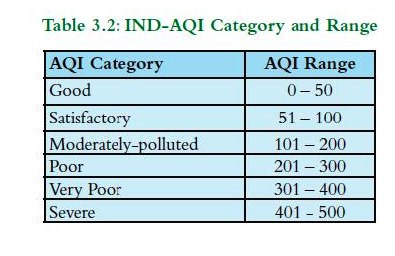

In [23]:
plt.figure(figsize=(12,5), dpi=60)
image = plt.imread('img/table.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [24]:
aqi[(aqi > 0) & (aqi <= 50)] = 0
aqi[(aqi > 50) & (aqi <= 100)] = 1
aqi[(aqi > 100) & (aqi <= 150)] = 2
aqi[(aqi > 150) & (aqi <= 200)] = 3
#aqi[(aqi > 200) & (aqi <= 300)] = 4
aqi[(aqi > 200)] = 4

In [25]:
aqi.unique()

array([3., 2., 1., 0., 4.])

In [26]:
data['label'] = data['AQI'].astype('int8')
data.head()

,CO,NO2,O3,PM10,PM2.5,SO2,AQI,label
0,0.79,16.0,37.0,177.0,78.0,12.0,3.0,3
1,0.80,16.0,36.0,178.0,77.0,11.0,3.0,3
2,0.71,13.0,38.0,163.0,72.0,8.0,3.0,3
3,0.66,11.0,39.0,147.0,65.0,6.5,2.0,2
4,0.53,10.0,38.0,131.0,56.0,5.5,2.0,2


In [27]:
data.drop(columns=['AQI'], axis= 1, inplace=True)

In [28]:
data.tail()

,CO,NO2,O3,PM10,PM2.5,SO2,label
218634,1.05,39.0,35.0,129.0,72.0,4.5,2
218635,0.96,37.0,31.0,132.0,79.0,3.7,2
218636,0.82,28.0,34.0,130.0,71.0,3.5,2
218637,0.88,32.0,27.0,120.0,76.0,4.6,2
218638,0.84,29.0,29.0,120.0,76.0,3.4,2


In [29]:
data.index

RangeIndex(start=0, stop=218639, step=1)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218639 entries, 0 to 218638
Data columns (total 7 columns):
CO       218639 non-null float64
NO2      218639 non-null float64
O3       218639 non-null float64
PM10     218639 non-null float64
PM2.5    218639 non-null float64
SO2      218639 non-null float64
label    218639 non-null int8
dtypes: float64(6), int8(1)
memory usage: 10.2 MB


In [31]:
data = temp_data.join(data)

In [32]:
data.head()

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
0,16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0,3
1,16.0,57.0,2.1,0.15,1.3,17.0,0.80,16.0,36.0,178.0,77.0,11.0,3
2,16.0,57.0,2.1,0.13,1.0,14.0,0.71,13.0,38.0,163.0,72.0,8.0,3
3,15.0,58.0,2.0,0.12,0.8,12.0,0.66,11.0,39.0,147.0,65.0,6.5,2
4,15.0,58.0,2.0,0.11,0.6,11.0,0.53,10.0,38.0,131.0,56.0,5.5,2


In [33]:
# save the labeled data
data.to_csv('input/labeled_data.csv',index=False)

In [34]:
data.head()

,TEMP,RH,CH4,NMHC,NO,NOx,CO,NO2,O3,PM10,PM2.5,SO2,label
0,16.0,57.0,2.1,0.14,1.2,17.0,0.79,16.0,37.0,177.0,78.0,12.0,3
1,16.0,57.0,2.1,0.15,1.3,17.0,0.80,16.0,36.0,178.0,77.0,11.0,3
2,16.0,57.0,2.1,0.13,1.0,14.0,0.71,13.0,38.0,163.0,72.0,8.0,3
3,15.0,58.0,2.0,0.12,0.8,12.0,0.66,11.0,39.0,147.0,65.0,6.5,2
4,15.0,58.0,2.0,0.11,0.6,11.0,0.53,10.0,38.0,131.0,56.0,5.5,2


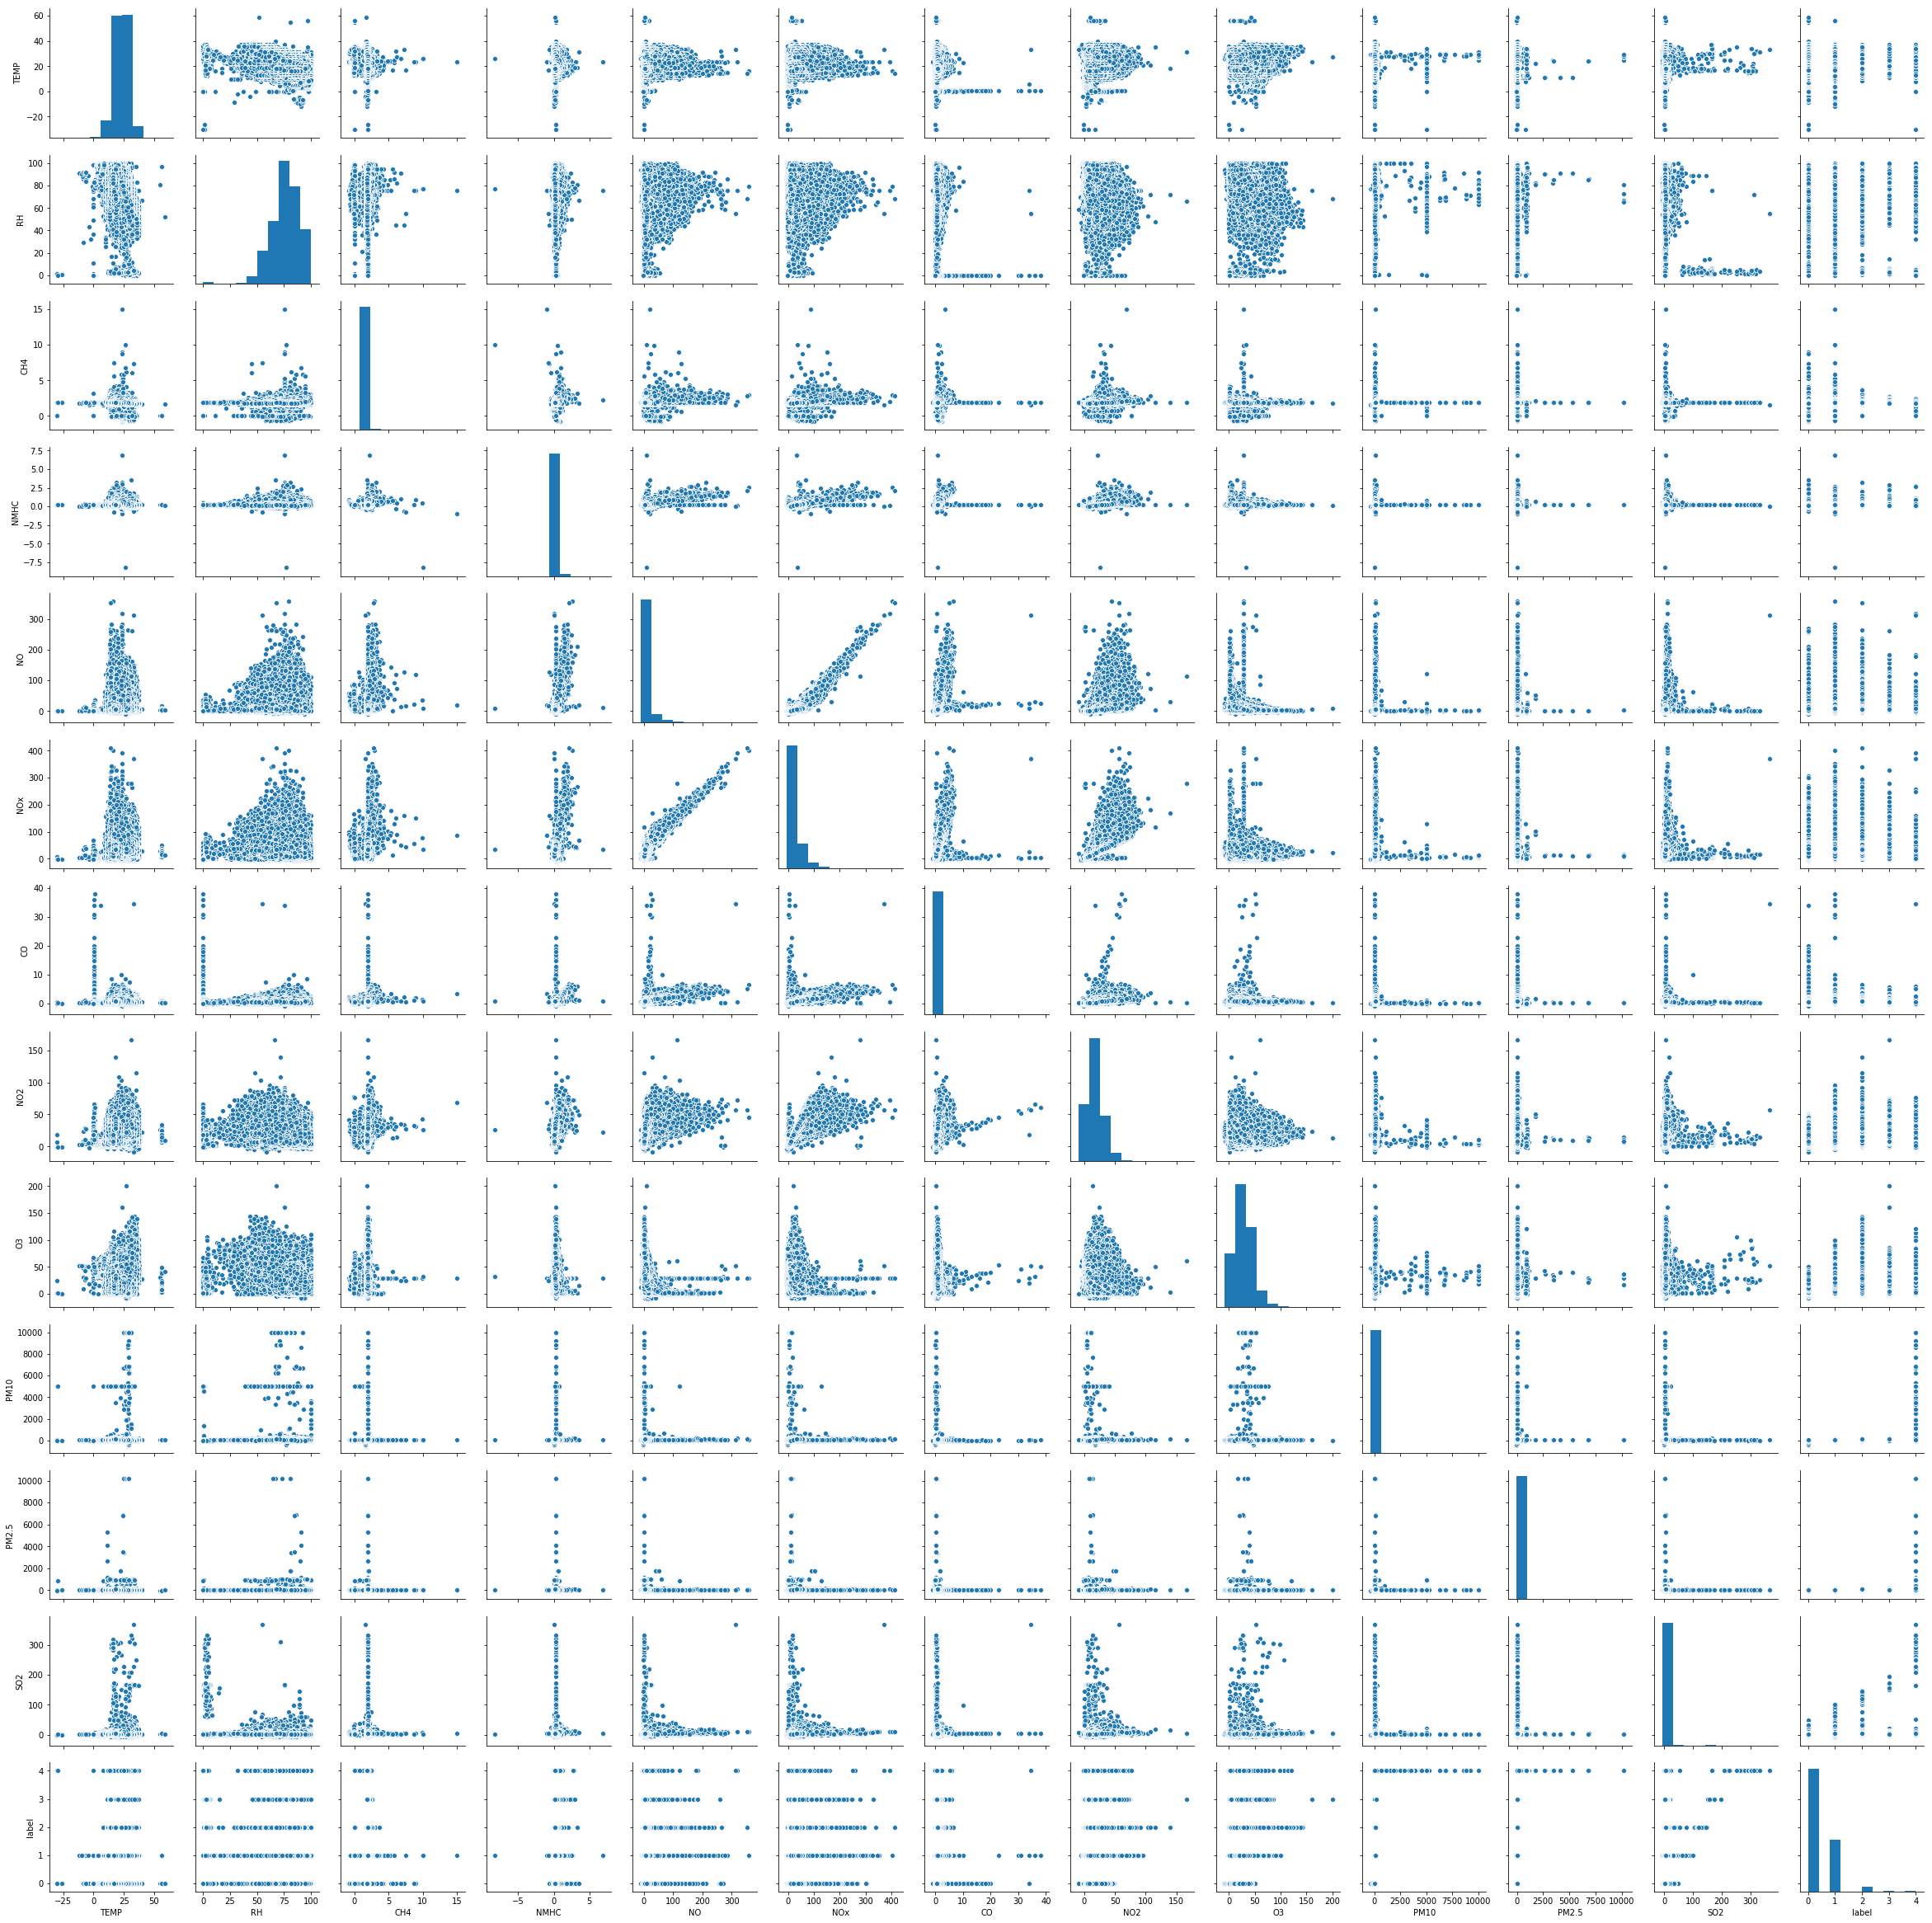

In [35]:
sns.pairplot(data)

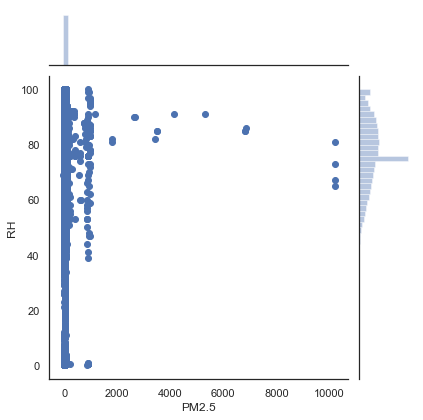

In [36]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='PM2.5',y='RH',data=data)

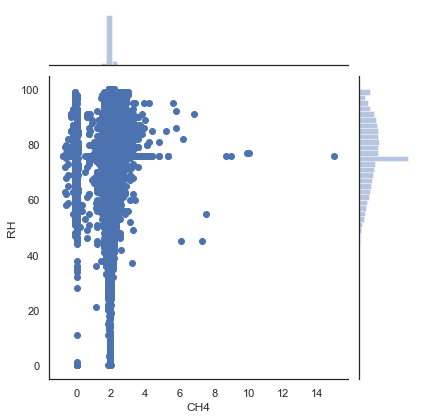

In [37]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CH4',y='RH',data=data)

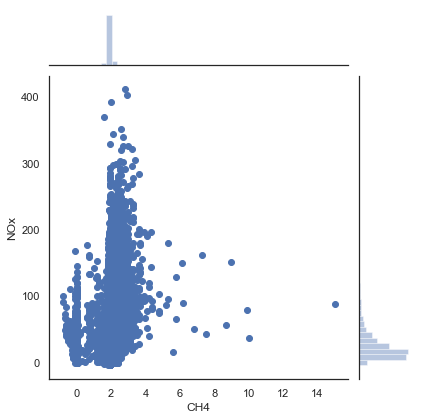

In [38]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CH4',y='NOx',data=data)

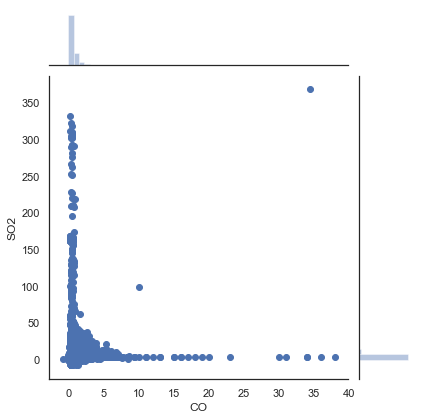

In [39]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='CO',y='SO2',data=data)

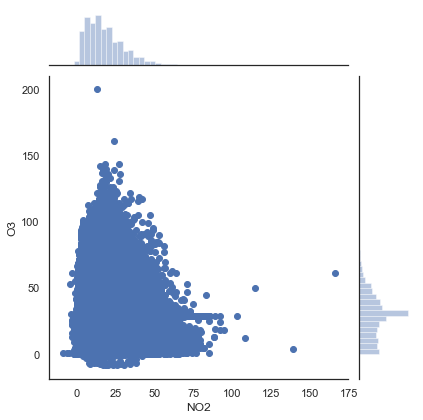

In [40]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='NO2',y='O3',data=data)

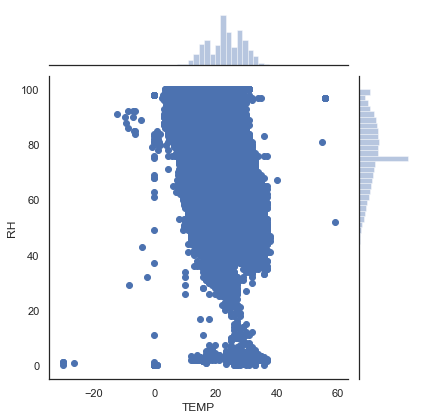

In [41]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='TEMP',y='RH',data=data)

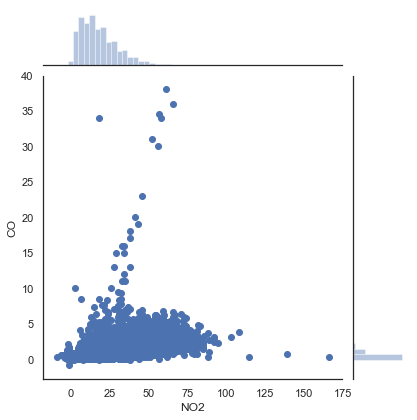

In [42]:
sns.set(style="white", color_codes=True)
sns.jointplot(x='NO2',y='CO',data=data)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [45]:
X_train.to_excel('Traning_Testing/X_train.xlsx')
X_test.to_excel('Traning_Testing/X_test.xlsx')
y_train.to_excel('Traning_Testing/y_train.xlsx')
y_test.to_excel('Traning_Testing/y_test.xlsx')

In [100]:
#NAVIE BAYES ALGORITHM
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [101]:
model=GaussianNB()
model=model.fit(X_train, y_train)

In [102]:
predictNB=model.predict(X_test)

In [103]:
crDT = precision_recall_fscore_support(y_test,predictNB,average='weighted')
precisionNB = crDT[0]
recallNB = crDT[1]
f1scoreNB = crDT[2]
precisionNB

0.8423718726829269

In [104]:
classificationReportNB = classification_report(y_test,predictNB)

In [105]:
confusionmatrixNB=confusion_matrix(y_test,predictNB)

In [106]:
print(classificationReportNB)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     29727
           1       0.78      0.65      0.71     12606
           2       0.69      0.79      0.74      1200
           3       0.08      0.34      0.13       107
           4       0.84      0.78      0.81        88

   micro avg       0.84      0.84      0.84     43728
   macro avg       0.65      0.70      0.66     43728
weighted avg       0.84      0.84      0.84     43728



In [107]:
print(confusionmatrixNB)

[[27462  2093     2   160    10]
 [ 3823  8219   351   212     1]
 [    0   230   948    22     0]
 [    0     1    68    36     2]
 [    0     0     0    19    69]]


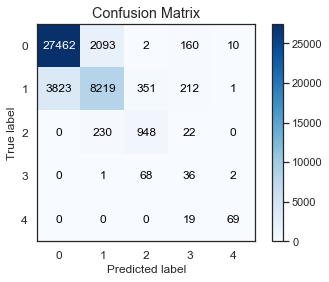

In [108]:
skplt.metrics.plot_confusion_matrix(y_test, predictNB, normalize=False)
plt.show()

In [109]:
#RANDOM FOREST TREE
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc = RandomForestClassifier(n_estimators=600)

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [112]:
predictions = rfc.predict(X_test)

In [113]:
predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=int8)

In [114]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [115]:
cr = precision_recall_fscore_support(y_test,predictions,average='weighted')

In [116]:
precision = cr[0]
recall = cr[1]
f1score = cr[2]

In [117]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29727
           1       1.00      1.00      1.00     12606
           2       1.00      1.00      1.00      1200
           3       0.96      0.93      0.95       107
           4       0.99      0.94      0.97        88

   micro avg       1.00      1.00      1.00     43728
   macro avg       0.99      0.98      0.98     43728
weighted avg       1.00      1.00      1.00     43728



In [118]:
print(confusion_matrix(y_test,predictions))

[[29727     0     0     0     0]
 [    3 12602     1     0     0]
 [    0     2  1198     0     0]
 [    0     2     4   100     1]
 [    0     0     1     4    83]]


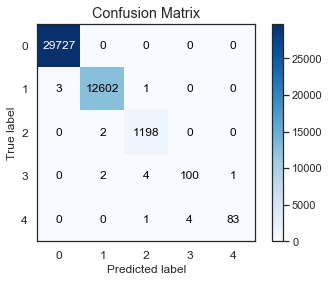

In [119]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False)
plt.show()

In [120]:
li_x = ["", 'Precision', 'Recall', 'F1 Score']
li_y = [0, float(precision), float(recall), float(f1score)]

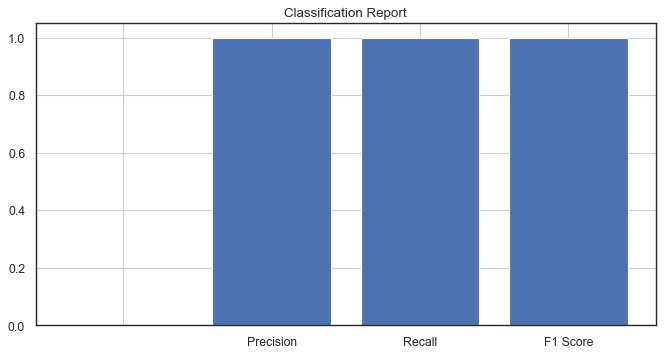

In [121]:
N = len(li_x)

ind = np.arange(N)

fig = plt.figure(figsize=(10,5), dpi=80)
plt.bar(ind, li_y)
plt.xticks(ind, li_x)
plt.title("Classification Report")
plt.grid(True)
plt.show()

In [72]:
#KNN ALGORITHM 
import itertools
def plot_confusion_matrix(cm, classes,title='Confusion matrix'):
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [73]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [74]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [75]:
pred = knn.predict(X_test)
print(pred)

[0 0 0 ... 0 0 1]


In [76]:
acc1 = accuracy_score(y_true=y_test, y_pred= pred)
print(acc1)

0.9692188071716062


In [77]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [78]:
cr = precision_recall_fscore_support(y_test,pred,average='weighted')

In [79]:
precisionKNN = cr[0]
recall = cr[1]
f1score = cr[2]

In [80]:
cm1 = confusion_matrix(y_true=y_test,y_pred=pred)

In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     29727
           1       0.95      0.94      0.95     12606
           2       0.91      0.92      0.92      1200
           3       0.94      0.88      0.91       107
           4       0.96      0.99      0.97        88

   micro avg       0.97      0.97      0.97     43728
   macro avg       0.95      0.94      0.95     43728
weighted avg       0.97      0.97      0.97     43728



In [82]:
print(cm1)

[[29186   541     0     0     0]
 [  601 11908    97     0     0]
 [    0    88  1107     5     0]
 [    0     0     9    94     4]
 [    0     0     0     1    87]]


In [83]:
level=data['label'].unique()
print(level)

[3 2 1 0 4]


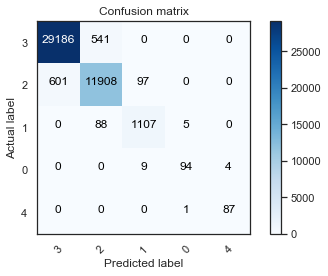

In [84]:
plot_confusion_matrix(cm1, level,title='Confusion matrix')

In [124]:
#COMPARING RESULTS OF DECISION TREE AND RANDOM FOREST AND KNN
li_x = ['NB', 'RF','KNN']
li_y = [precisionNB, precision, precisionKNN]

[0.8423718726829269, 0.9995850995384271, 0.9691867146168233]


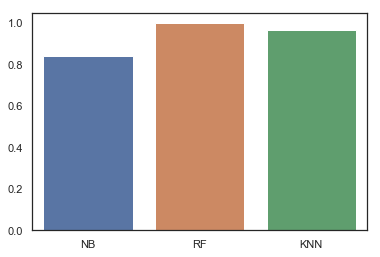

In [125]:
print(li_y)
sns.barplot(x=li_x, y=li_y)

In [87]:
CO = X_test.CO
SO2 = X_test.SO2
NO2 = X_test.NO2
O3 = X_test.O3
PM10 = X_test.PM10

In [88]:
CO_mean = CO.mean()
SO2_mean = SO2.mean()
NO2_mean = NO2.mean()
O3_mean = O3.mean()
PM10_mean = PM10.mean()

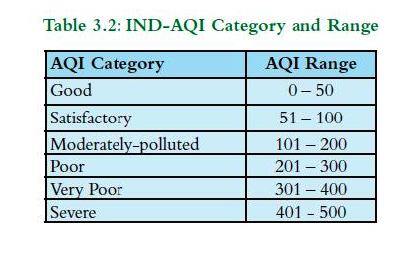

In [89]:
plt.figure(figsize=(12,5), dpi=60)
image = plt.imread('img/table.png')
plt.axis('off')
plt.imshow(image)
plt.show()

In [90]:
def checkCo(q):
    v = ''
    if q > 0 and q <= 1:
        v = "Good"
    elif q > 1.1 and q <= 2.0:
        v = "Satisfactory"
    elif q > 2.1 and q <= 10:
        v = "Moderately Polluted"
    elif q > 10 and q <= 17:
        v = "Poor"
    elif q > 17 and q <= 34:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('CO-->  %2.3f    %s' %(q, v))
        

In [91]:
def checkSO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 380:
        v = "Moderately Polluted"
    elif q > 381 and q <= 800:
        v = "Poor"
    elif q > 801 and q <= 1600:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('SO2-->  %2.3f    %s' %(q, v))

In [92]:
def checkNO2(q):
    v = ''
    if q > 0 and q <= 40:
        v = "Good"
    elif q > 41 and q <= 80:
        v = "Satisfactory"
    elif q > 81 and q <= 180:
        v = "Moderately Polluted"
    elif q > 181 and q <= 280:
        v = "Poor"
    elif q > 281 and q <= 400:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('NO2-->  %2.3f    %s' %(q, v))

In [93]:
def checkO3(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 168:
        v = "Moderately Polluted"
    elif q > 169 and q <= 208:
        v = "Poor"
    elif q > 209 and q <= 748:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('O3-->  %2.3f    %s' %(q, v))

In [94]:
def checkPM(q):
    v = ''
    if q > 0 and q <= 50:
        v = "Good"
    elif q > 51 and q <= 100:
        v = "Satisfactory"
    elif q > 101 and q <= 250:
        v = "Moderately Polluted"
    elif q > 251 and q <= 350:
        v = "Poor"
    elif q > 351 and q <= 430:
        v = "Very Poor"
    else:
        v = "Severe"
        
    print('PM-->  %2.3f    %s' %(q, v))

In [95]:
l = [checkCo(CO_mean), checkSO2(SO2_mean), checkNO2(NO2_mean), checkO3(O3_mean), checkPM(PM10_mean)]


CO-->  0.561    Good
SO2-->  3.403    Good
NO2-->  17.848    Good
O3-->  29.028    Good
PM-->  46.905    Good


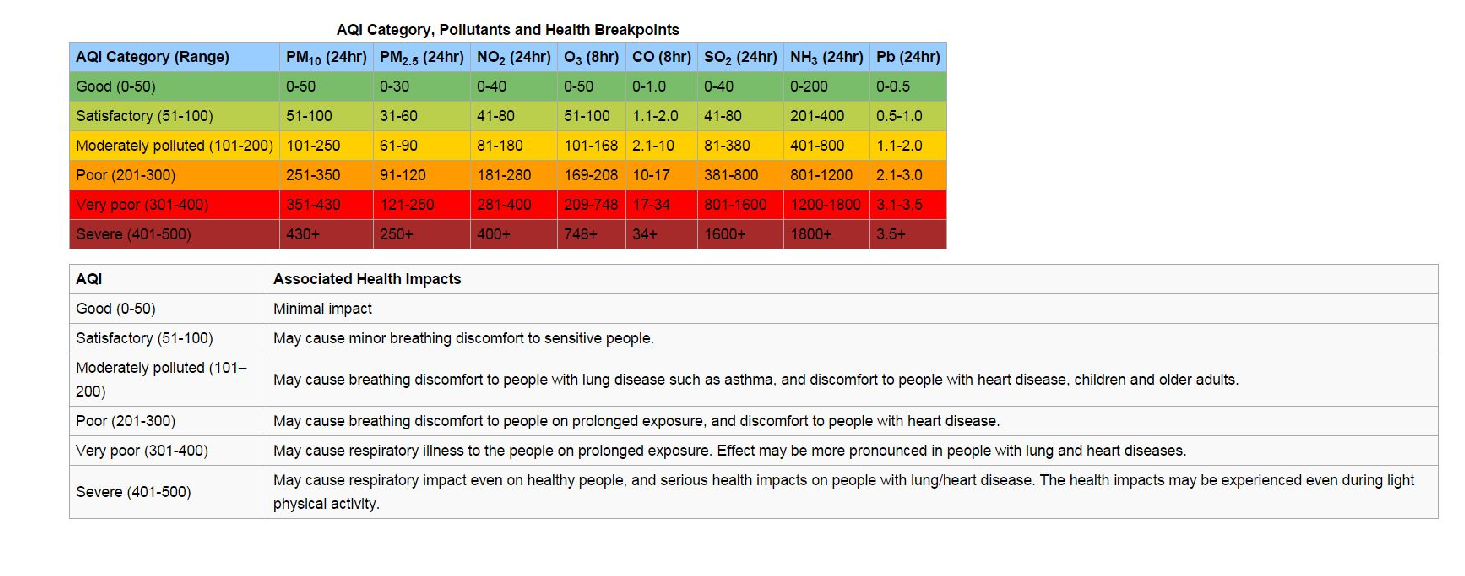

In [96]:
plt.figure(figsize=(15,8), dpi=120)
image = plt.imread('img/1a.png')
plt.axis('off')
plt.imshow(image)
plt.show()

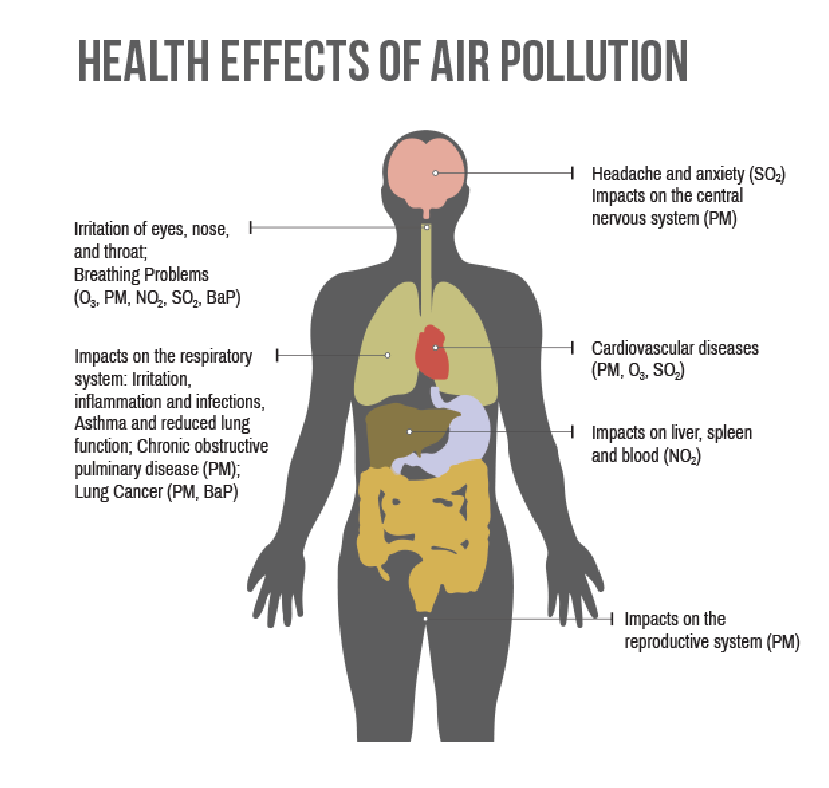

In [97]:
plt.figure(figsize=(15,8), dpi=120)
image = plt.imread('img/health.png')
plt.axis('off')
plt.imshow(image)
plt.show()